In [1]:
FINAL_DATA_PATH =  r'D:\Projects\Quantum Bits\News-Impact-on-Stock-Prices-\Project_data\output\final_data.csv'
SNT_SCORE_DATA_PATH =  r'D:\Projects\Quantum Bits\News-Impact-on-Stock-Prices-\Project_data\output\sen_score_data.csv'
TFIDF_DATA_PATH =  r'D:\Projects\Quantum Bits\News-Impact-on-Stock-Prices-\Project_data\output\TFIDF.csv'


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer , AutoModelForSequenceClassification
from scipy.special import softmax
# Ensure required NLTK packages are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)



# Text Preprocessing

In [4]:
df = pd.read_csv(FINAL_DATA_PATH)

In [5]:
df['Processed_Headline'] = df['Headline'].apply(preprocess_text)

In [6]:
df

,Ticker,Date,Headline,Close,Price_Change,Label,Processed_Headline
0,AAPL,2024-08-28,apple becomes indias largest bluecollar job cr...,226.490005,-1.539993,-1,apple becomes india largest bluecollar job cre...
1,AAPL,2024-08-29,ipad mini 7 rumored for september launch as cu...,229.789993,3.299988,1,ipad mini 7 rumored september launch current m...
2,AAPL,2024-08-30,vertex pharmaceutical inc vrtx jim cramers got...,229.000000,-0.789993,-1,vertex pharmaceutical inc vrtx jim cramers got...
3,AMD,2024-08-20,broadcom inc avgo a tech stock to monitor amid...,156.399994,1.119995,1,broadcom inc avgo tech stock monitor amid mark...
4,AMD,2024-08-21,jim cramer on advanced micro devices inc amds ...,157.809998,1.410004,1,jim cramer advanced micro device inc amd zt sy...
...,...,...,...,...,...,...,...
108,ORCL,2024-08-30,"final trades lennar oracle and seagate , exclu...",141.289993,1.869995,1,final trade lennar oracle seagate exclusive ch...
109,TSLA,2024-08-27,hmgs us ev sales rank second behind tesla tops...,209.210007,-4.000000,-1,hmgs u ev sale rank second behind tesla top 10...
110,TSLA,2024-08-28,your unrealized gains are safe from bidenharri...,205.750000,-3.460007,-1,unrealized gain safe bidenharris tax proposal ...
111,TSLA,2024-08-29,"10 best car subscription services in usa , elo...",206.279999,0.529999,1,10 best car subscription service usa elon musk...


# Sentiment Analysis

VADER scoring is good for short texts and works well with financial news.

In [9]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [10]:
df.head()

,Ticker,Date,Headline,Close,Price_Change,Label,Processed_Headline
0,AAPL,2024-08-28,apple becomes indias largest bluecollar job cr...,226.490005,-1.539993,-1,apple becomes india largest bluecollar job cre...
1,AAPL,2024-08-29,ipad mini 7 rumored for september launch as cu...,229.789993,3.299988,1,ipad mini 7 rumored september launch current m...
2,AAPL,2024-08-30,vertex pharmaceutical inc vrtx jim cramers got...,229.000000,-0.789993,-1,vertex pharmaceutical inc vrtx jim cramers got...
3,AMD,2024-08-20,broadcom inc avgo a tech stock to monitor amid...,156.399994,1.119995,1,broadcom inc avgo tech stock monitor amid mark...
4,AMD,2024-08-21,jim cramer on advanced micro devices inc amds ...,157.809998,1.410004,1,jim cramer advanced micro device inc amd zt sy...


In [11]:
text =  df['Headline'][0]

In [12]:
text

'apple becomes indias largest bluecollar job creator , apple pushing enhanced optical zoom for iphones to stay competitive , salesforce ceo on robot sales agents microsofts ai letdowns and big earnings beat , apple introduces aipowered object removal in photos with the latest ios update , one tech tip how to get the most life out of your device , prediction this undertheradar tech stock will outperform nvidia and apple by 2030 , berkshire hathaway cut apple stake to have margin of safety , is apple siri the best ai assistant in 2024 , google revamps controversial ai image generation tool after backlash'

In [13]:
sid.polarity_scores(text)

{'neg': 0.038, 'neu': 0.877, 'pos': 0.085, 'compound': 0.7003}

In [14]:
# Apply VADER
df['Sentiment'] = df['Headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [15]:
df.head()

,Ticker,Date,Headline,Close,Price_Change,Label,Processed_Headline,Sentiment
0,AAPL,2024-08-28,apple becomes indias largest bluecollar job cr...,226.490005,-1.539993,-1,apple becomes india largest bluecollar job cre...,0.7003
1,AAPL,2024-08-29,ipad mini 7 rumored for september launch as cu...,229.789993,3.299988,1,ipad mini 7 rumored september launch current m...,0.9485
2,AAPL,2024-08-30,vertex pharmaceutical inc vrtx jim cramers got...,229.000000,-0.789993,-1,vertex pharmaceutical inc vrtx jim cramers got...,0.9531
3,AMD,2024-08-20,broadcom inc avgo a tech stock to monitor amid...,156.399994,1.119995,1,broadcom inc avgo tech stock monitor amid mark...,0.6908
4,AMD,2024-08-21,jim cramer on advanced micro devices inc amds ...,157.809998,1.410004,1,jim cramer advanced micro device inc amd zt sy...,0.4767


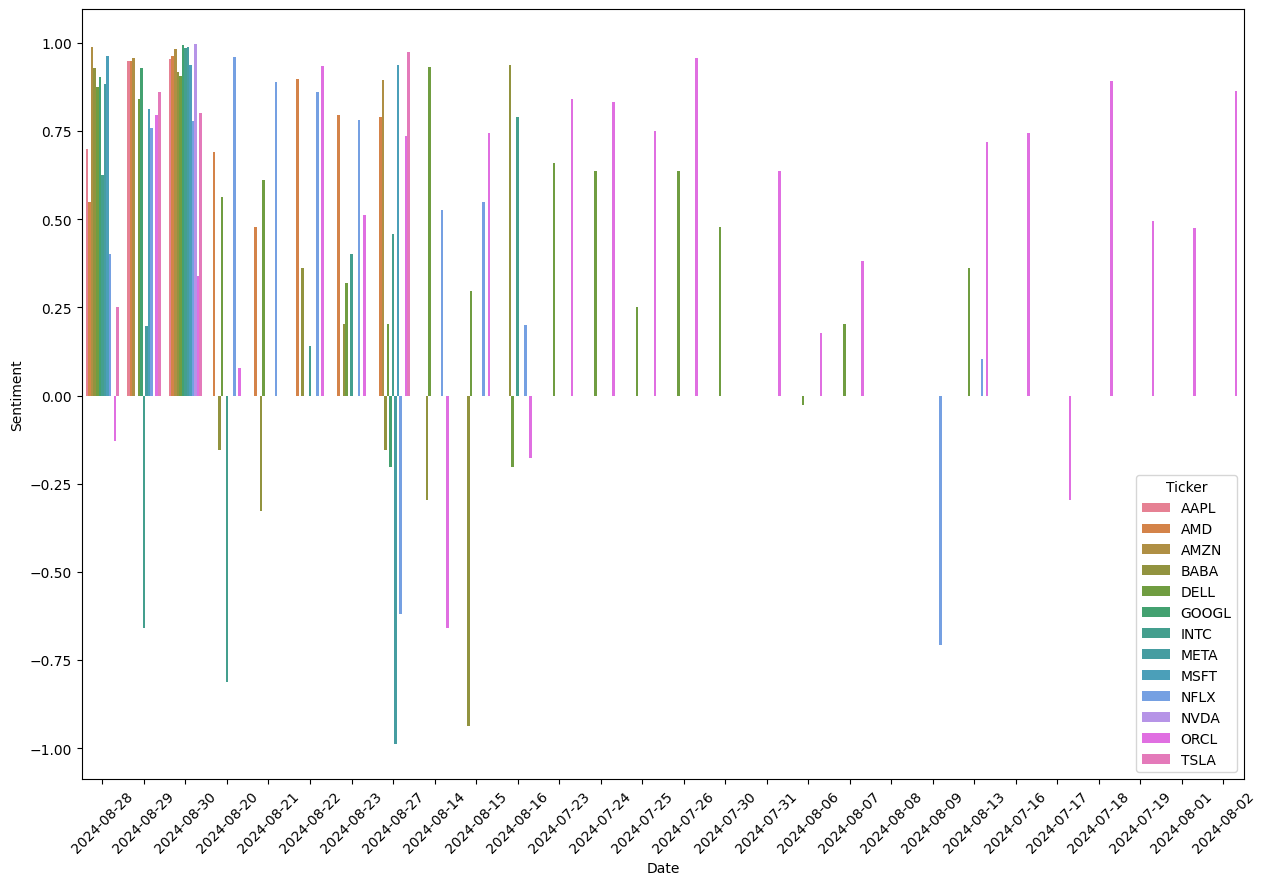

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(df, x = 'Date' , y= 'Sentiment' , hue= 'Ticker')
plt.xticks(rotation = 45)

plt.show()

<Axes: xlabel='Label'>

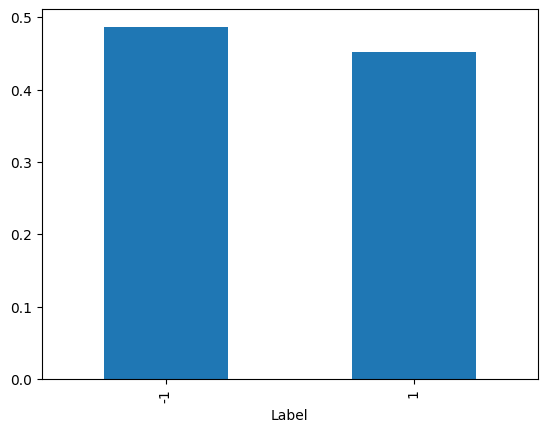

In [17]:
df.groupby('Label')['Sentiment'].mean().plot(kind='bar')

In [18]:
set_data = df.copy()

In [20]:
set_data.to_csv(SNT_SCORE_DATA_PATH , index=False)

Based in this info from VADER the news Sentiment don't effect in the stock prices.

but VADER uses the bag of word technique, so it measures the sentiment for each word individually, That probably doesn't give accurate results so let's try an advanced technique based on transformers that take the context into account

## Roberta Model

In [23]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DELL\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-package

In [51]:
text =  df['Headline'][1]

encoded_text =  tokenizer(text , return_tensors='pt')
output = model(**encoded_text)
score =  output[0][0].detach().numpy()
score = softmax(score) 

score_dict = {
    'roberta_neg' : score[0],
    'roberta_neu' : score[1],
    'roberta_pos' : score[2],
    
}

score_dict

{'roberta_neg': 0.06633939,
 'roberta_neu': 0.72556937,
 'roberta_pos': 0.20809126}

In [52]:
sid.polarity_scores(text)

{'neg': 0.018, 'neu': 0.906, 'pos': 0.077, 'compound': 0.9485}